In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def import_genome_data_as_df(filename = "REAL.hapt", labels = "REAL.tsv"):
    df = pd.read_csv('./data/' + filename, delimiter = ' ')
    if labels:
        labels_df = pd.read_csv('./data/' + labels, header = 0, sep = '\t')

        superpopulation_code_dict = {
            'EUR': 0,
            'EAS': 1,
            'AMR': 2,
            'SAS': 3,
            'AFR': 4,
            'EUR,AFR': 5,
        }

        df.iloc[:, 1] = df.iloc[:, 1].astype(str).str[:-2]
        df = df.merge(labels_df[['Sample name','Superpopulation code']], left_on=df.iloc[:, 1], right_on='Sample name', how='inner')
        df['Superpopulation code'].replace(superpopulation_code_dict, inplace=True)
        df = df.drop(columns='Sample name')
    
    return df

In [3]:
SAMPLE_SIZE = 1000
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier

In [4]:
# Load data and build model
#sample = import_genome_data_as_df().sample(SAMPLE_SIZE).reset_index(drop=True)
sample = import_genome_data_as_df().reset_index(drop=True)
X = sample.iloc[:, 3:10002]
y = np.ravel(sample.iloc[:, 10002:10003])
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
# Make predictions on data used to build the model
predictions = knn_model.predict(X)

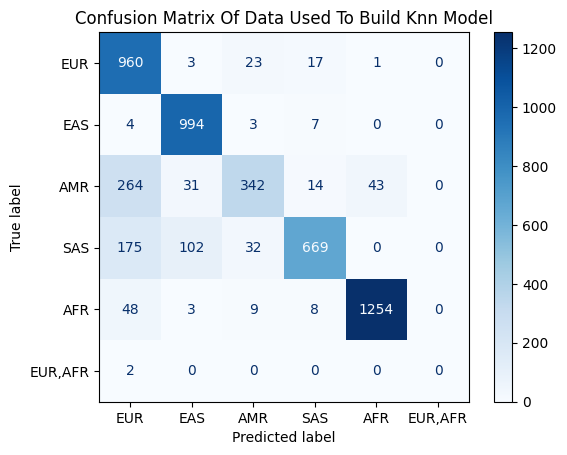

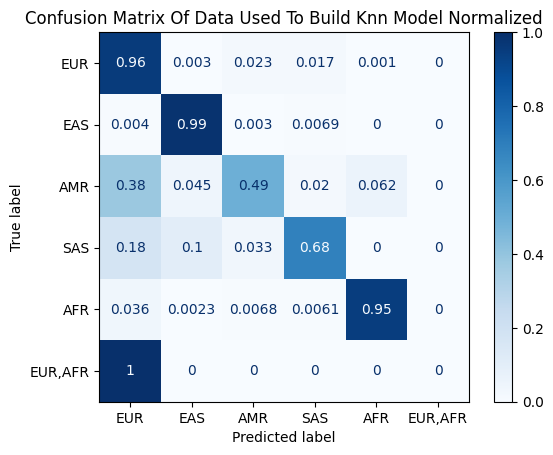

0.8424520766773163


In [6]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model Normalized")

plt.show()

print(knn_model.score(X, y))

In [ ]:
test_sample = import_genome_data_as_df().sample(SAMPLE_SIZE).reset_index(drop=True)
test_sample_input = test_sample.iloc[:, 3:10002]
test_sample_real = np.ravel(test_sample.iloc[:, 10002:10003])
test_predictions = knn_model.predict(test_sample_input)

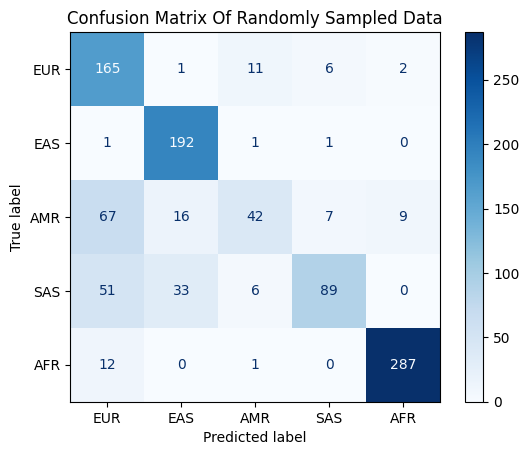

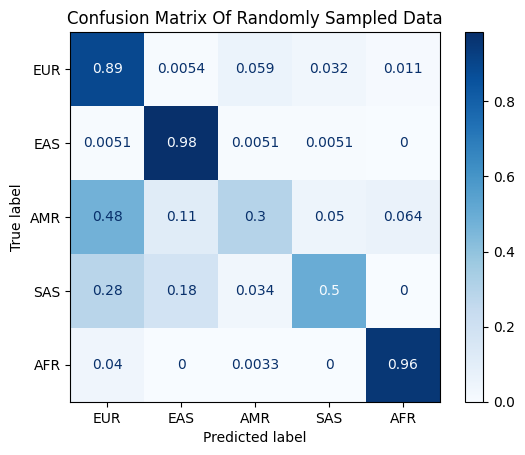

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Randomly Sampled Data")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    test_sample_input,
    test_sample_real,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Randomly Sampled Data Normalized")

plt.show()